In [119]:
# Want to do some map plotting :)

import pandas as pd
import reverse_geocoder as rg
from pathlib import Path
import geopandas
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import numpy as np

df_path = Path(r'Data\Country_Code.csv')
df_path

WindowsPath('Data/Country_Code.csv')

In [120]:
venues_df = pd.read_csv(df_path)
venues_df

,Unnamed: 0,Lat,Long,Venue_Type,Venue_Name,Created_On,latlong,Country
0,0,35.661916,139.735097,shopping,GCゆきざき (GC Yukizaki),1580182467,"(35.66191632, 139.73509669999999)",JP
1,1,35.668955,139.761436,shopping,GCゆきざき (GC Yukizaki),1580182719,"(35.66895489, 139.761436)",JP
2,2,35.663355,139.732951,shopping,GCゆきざき Gem Castle (GC Yukizaki),1580182929,"(35.66335459, 139.73295090000002)",JP
3,3,35.663773,139.731444,shopping,GCゆきざき (GC Yukizaki),1580183013,"(35.66377299, 139.7314435)",JP
4,4,49.595684,17.250112,shopping,Marton's Work,1579299302,"(49.59568425, 17.2501123)",CZ
...,...,...,...,...,...,...,...,...
1096,1096,46.252965,14.455824,transport,Avtoservis Selan,1589371328,"(46.25296472, 14.45582449)",SI
1097,1097,46.019798,14.542299,cafe,Coffee shop P,1589527617,"(46.019797499999996, 14.54229891)",SI
1098,1098,36.717352,-4.421144,default,PM Abogados,1589653233,"(36.7173523, -4.421144128)",ES
1099,1099,46.075251,6.564878,shopping,CITADEL Vault,1589811913,"(46.07525136, 6.564878225)",FR


Now let's get the country codes and their respective continents


In [121]:
response = requests.get('https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv')

file_object = io.StringIO(response.content.decode('utf-8'))

country_codes_df = pd.read_csv(file_object)
country_codes_df = country_codes_df.iloc[:,0:5]

# merge this into our original df
venues_df = venues_df.merge(country_codes_df, right_on='Two_Letter_Country_Code', left_on='Country', how='left')
venues_df.drop(['Two_Letter_Country_Code'], axis = 1)

# Now want to get countries summary and continents summary
# country_df

,Unnamed: 0,Lat,Long,Venue_Type,Venue_Name,Created_On,latlong,Country,Continent_Name,Continent_Code,Country_Name,Three_Letter_Country_Code
0,0,35.661916,139.735097,shopping,GCゆきざき (GC Yukizaki),1580182467,"(35.66191632, 139.73509669999999)",JP,Asia,AS,Japan,JPN
1,1,35.668955,139.761436,shopping,GCゆきざき (GC Yukizaki),1580182719,"(35.66895489, 139.761436)",JP,Asia,AS,Japan,JPN
2,2,35.663355,139.732951,shopping,GCゆきざき Gem Castle (GC Yukizaki),1580182929,"(35.66335459, 139.73295090000002)",JP,Asia,AS,Japan,JPN
3,3,35.663773,139.731444,shopping,GCゆきざき (GC Yukizaki),1580183013,"(35.66377299, 139.7314435)",JP,Asia,AS,Japan,JPN
4,4,49.595684,17.250112,shopping,Marton's Work,1579299302,"(49.59568425, 17.2501123)",CZ,Europe,EU,Czech Republic,CZE
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1096,46.252965,14.455824,transport,Avtoservis Selan,1589371328,"(46.25296472, 14.45582449)",SI,Europe,EU,"Slovenia, Republic of",SVN
1268,1097,46.019798,14.542299,cafe,Coffee shop P,1589527617,"(46.019797499999996, 14.54229891)",SI,Europe,EU,"Slovenia, Republic of",SVN
1269,1098,36.717352,-4.421144,default,PM Abogados,1589653233,"(36.7173523, -4.421144128)",ES,Europe,EU,"Spain, Kingdom of",ESP
1270,1099,46.075251,6.564878,shopping,CITADEL Vault,1589811913,"(46.07525136, 6.564878225)",FR,Europe,EU,"France, French Republic",FRA


In [122]:
# Need to convert to geopandas df
gdf = geopandas.GeoDataFrame(venues_df, geometry=geopandas.points_from_xy(venues_df.Long, venues_df.Lat))
print(gdf.head())

Unnamed: 0        Lat        Long Venue_Type  \
0           0  35.661916  139.735097   shopping   
1           1  35.668955  139.761436   shopping   
2           2  35.663355  139.732951   shopping   
3           3  35.663773  139.731444   shopping   
4           4  49.595684   17.250112   shopping   

                        Venue_Name  Created_On  \
0             GCゆきざき (GC Yukizaki)  1580182467   
1             GCゆきざき (GC Yukizaki)  1580182719   
2  GCゆきざき Gem Castle (GC Yukizaki)  1580182929   
3             GCゆきざき (GC Yukizaki)  1580183013   
4                    Marton's Work  1579299302   

                             latlong Country Continent_Name Continent_Code  \
0  (35.66191632, 139.73509669999999)      JP           Asia             AS   
1          (35.66895489, 139.761436)      JP           Asia             AS   
2  (35.66335459, 139.73295090000002)      JP           Asia             AS   
3         (35.66377299, 139.7314435)      JP           Asia             AS   
4    

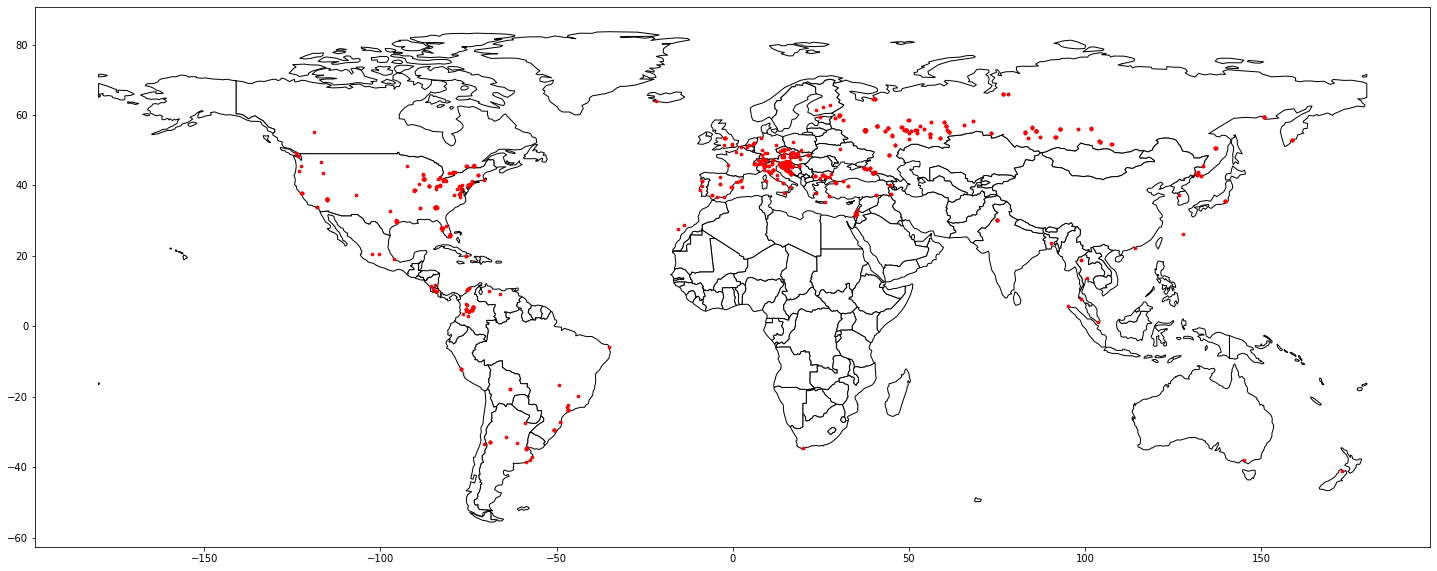

In [123]:
# Let's get a look at the world!

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent != 'Antarctica'].plot(
    color='white', edgecolor='black', figsize = (25,25))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', markersize = 7)

plt.show()

This is really neat and everything, but let's sum the number of new vendors in each country and look at that

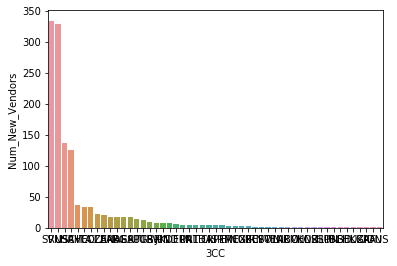

In [124]:
# get the values of each country(code)
cc_srs = venues_df['Three_Letter_Country_Code'].value_counts()
cc_df = cc_srs.to_frame().reset_index()
cc_df.columns = ['3CC','Num_New_Vendors']

sns.barplot(data = cc_df, x = '3CC', y = 'Num_New_Vendors')

The distribution is quite long tailed, let's try to plot it anyway. My hunch is that those two countries with a lot of new vendors will drown out, visually speaking, the representation of the others...

In [125]:
# Convert value counts series to geopandas
cc_gdf = geopandas.GeoDataFrame(cc_df)

# Get world dataset and add above data to it
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()
world = world.merge(cc_gdf, left_on = 'iso_a3', right_on = '3CC', how='left')
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,3CC,Num_New_Vendors
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,20.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,136.0
...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN


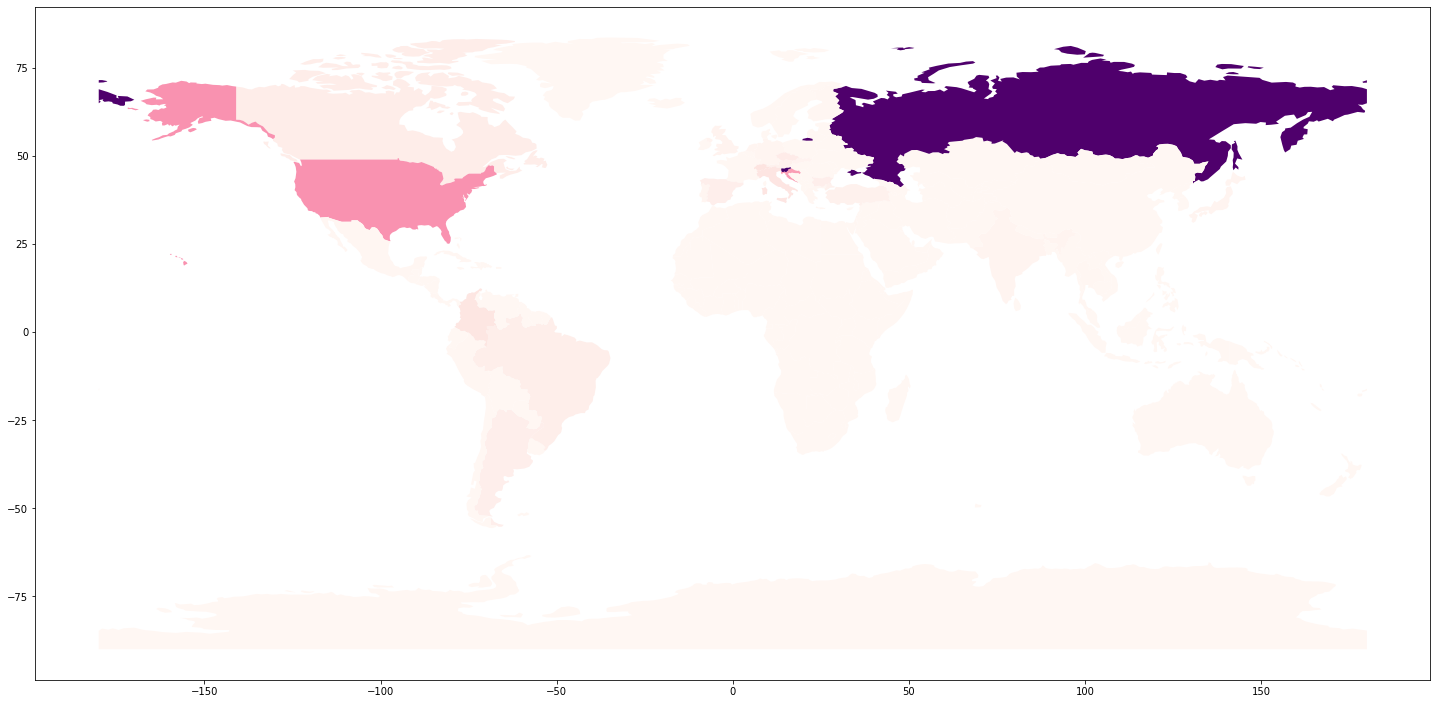

In [126]:
world.plot(column = 'Num_New_Vendors', cmap='RdPu', figsize = (25,25))

Not very visible, so let's do a log trick to fix this

In [127]:
world['Num_New_Vendors'] = np.log(world['Num_New_Vendors'])


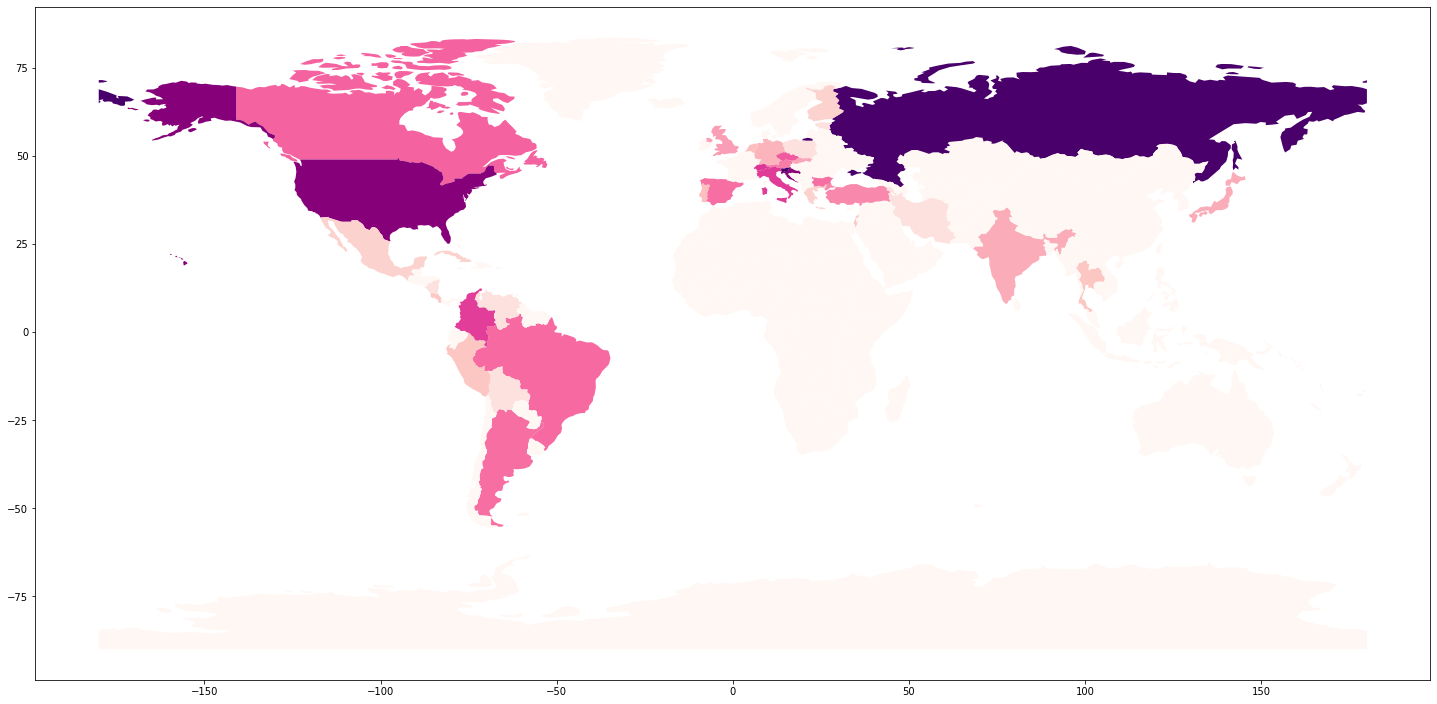

In [132]:
world.plot(column = 'Num_New_Vendors', cmap='RdPu', figsize = (25,25))

Ahh, that's much better! :) Now let's plot our original points on top of this map?

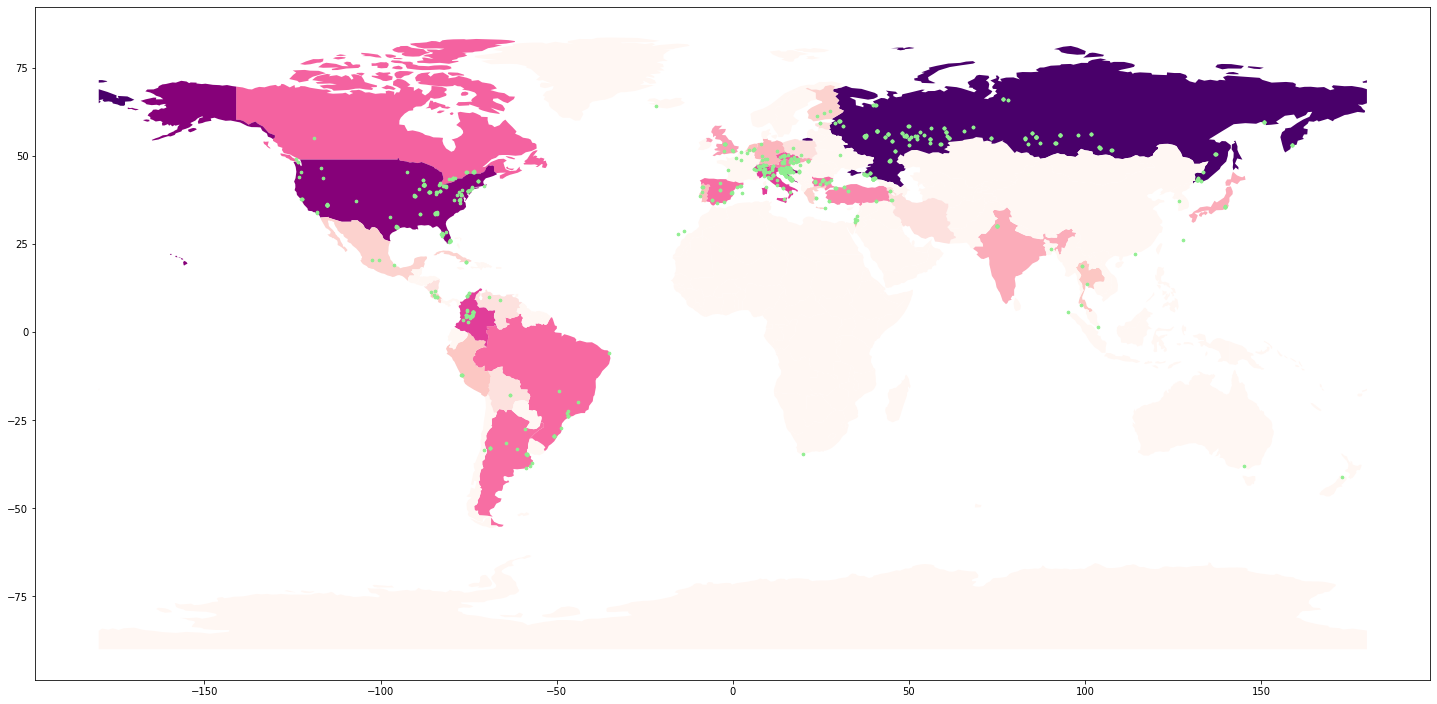

In [129]:
base = world.plot(column = 'Num_New_Vendors', cmap='RdPu', figsize = (25,25))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=base, color='lightgreen', markersize = 7)

Let's get a detailed view of Europe

In [173]:
eur_countries = world[world.continent == 'Europe'][world.name != 'Russia']
eur_countries

eur_gdf = gdf[gdf.Continent_Name == 'Europe'][gdf.Country_Name != 'Russian Federation']
eur_gdf['Country_Name'].value_counts()


Slovenia, Republic of                                 334
Croatia, Republic of                                  126
Switzerland, Swiss Confederation                       37
Italy, Italian Republic                                34
Czech Republic                                         22
Spain, Kingdom of                                      17
Bulgaria, Republic of                                  17
Austria, Republic of                                   14
United Kingdom of Great Britain & Northern Ireland      9
Slovakia (Slovak Republic)                              8
Germany, Federal Republic of                            6
Turkey, Republic of                                     6
France, French Republic                                 5
Portugal, Portuguese Republic                           5
Netherlands, Kingdom of the                             5
Finland, Republic of                                    3
Greece, Hellenic Republic                               3
Estonia, Repub

In [161]:
world[world.continent == 'Europe']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,3CC,Num_New_Vendors
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",RUS,5.793014
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.143 79.674, 15.523 80.016, ...",NaN,NaN
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",NaN,NaN
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.027 58.856, 11.468 59.432, 12.300...",NaN,NaN
111,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.177 56.169, 29.230 55.918, 29.372...",NaN,NaN
112,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.786 52.102, 32.159 52.061, 32.412...",UKR,0.000000
113,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.484 53.912, 23.528 53.470, 23.805...",POL,0.693147
114,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.980 48.123, 16.904 47.715, 16.341...",AUT,2.639057
115,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.086 48.422, 22.641 48.150, 22.711...",HUN,0.000000
116,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.619 48.221, 26.858 48.368, 27.523...",NaN,NaN


In [194]:
dir(eur_countries[eur_countries['name'] == 'France'].geometry)
eur_countries[eur_countries['name'] == 'France'].geometry

43    MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...
Name: geometry, dtype: geometry

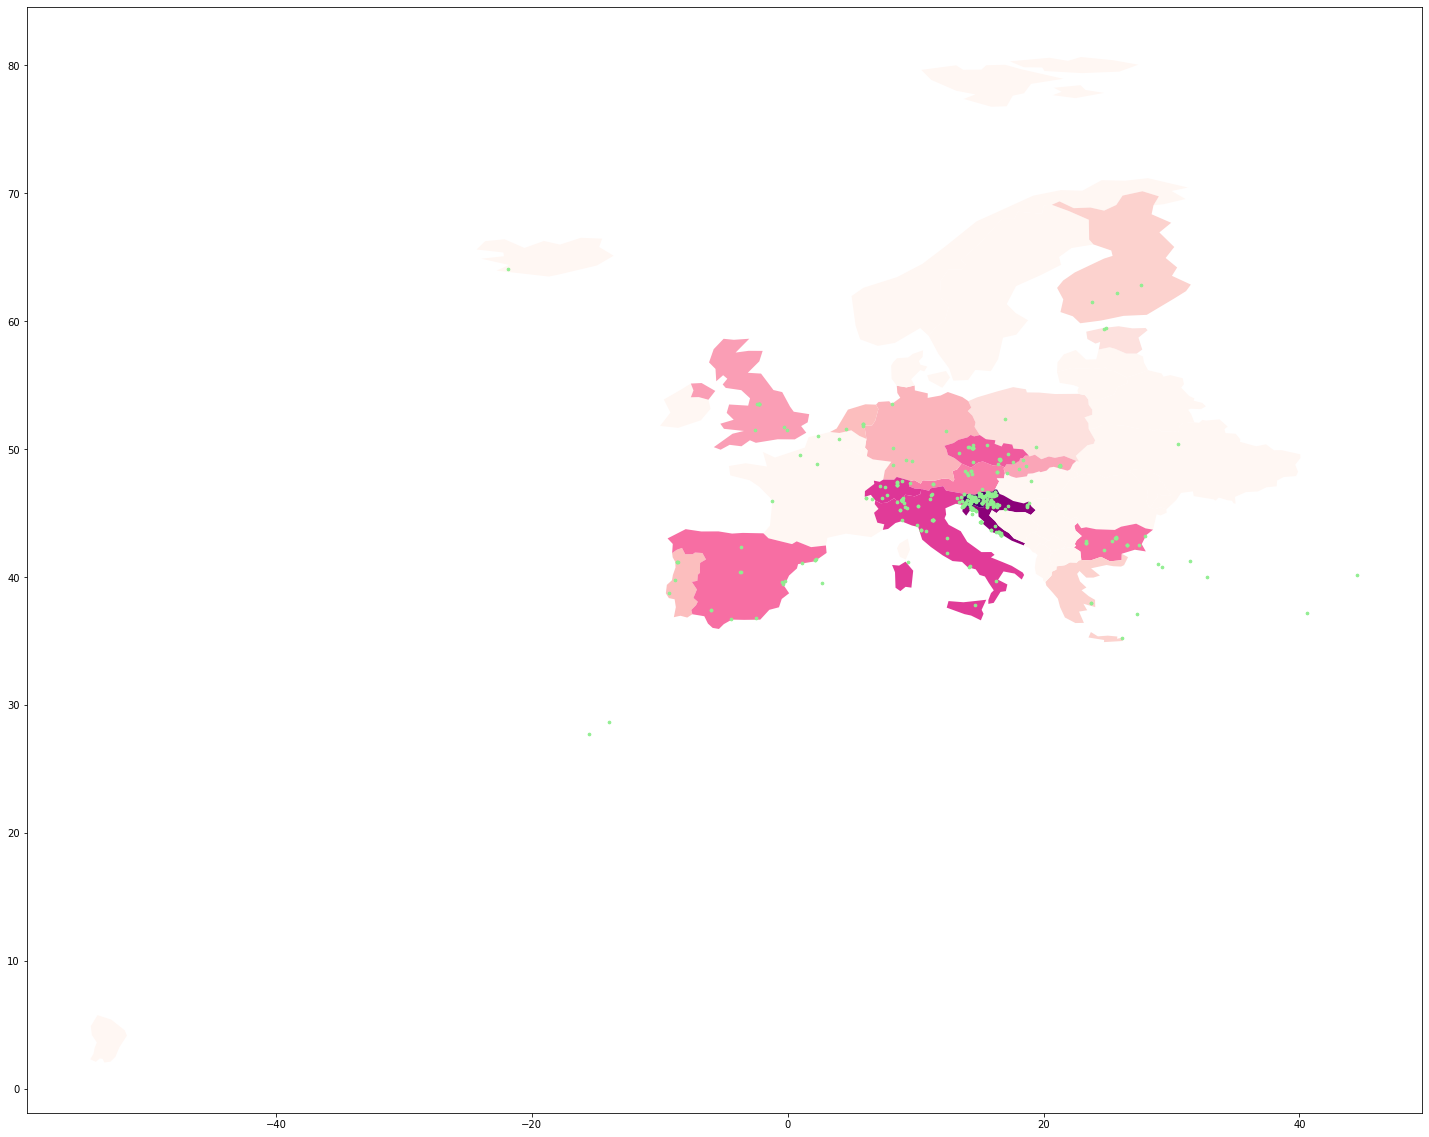

In [174]:
base = eur_countries.plot(column = 'Num_New_Vendors', cmap='RdPu', figsize = (25,25))

# We can now plot our ``GeoDataFrame``.
eur_gdf.plot(ax=base, color='lightgreen', markersize = 7)